For an assignment you previously submitted, reimplement the solution with a faster approach. 

Measure the change of timing for the original and revised notebooks

Submit the original notebook (with timings present in the notebook) and the revised notebook (with timings present in the notebook)

Options for improving performance (suggestions; not required):

•Rewrite the code to perform the same outcome more efficiently
•Use numba
•Use multiprocessing
•Replace a function call with lambda
•Replace a for loop with a list comprehension
•Use a RAM disk
•Make fewer external function calls (eg faker, random)

Enter number of rolls:1000000


,Roll Type,1,2,3,4,5,6
0,fair,166373,166022,167940,166737,166137,166791
1,biased,149969,150254,149640,149359,149888,250890


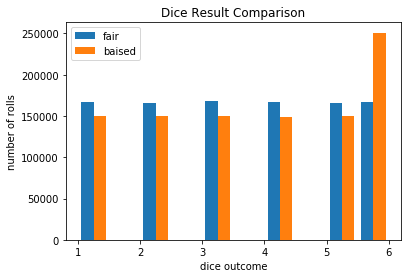

Run time: 29.183242797851562 seconds


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas
import time

def dice_simulate(num_run):
    fair_dice_result = []
    biased_dice_result = []
    for i in range(num_run):  
        fair_dice = random.randint(1,6)
        fair_dice_result.append(fair_dice)
        
        dice_list = [1,2,3,4,5,6]
        biased_dice = np.random.choice(dice_list, 1, p=[0.15, 0.15, 0.15, 0.15, 0.15, 0.25])
        biased_dice_result.append(biased_dice[0])
    
    
    df = pandas.DataFrame([{'Roll Type':'fair','1':fair_dice_result.count(1),'2':fair_dice_result.count(2),
                           '3':fair_dice_result.count(3),'4':fair_dice_result.count(4),
                           '5':fair_dice_result.count(5),'6':fair_dice_result.count(6)},
                            {'Roll Type':'biased','1':biased_dice_result.count(1),'2':biased_dice_result.count(2),
                           '3':biased_dice_result.count(3),'4':biased_dice_result.count(4),
                           '5':biased_dice_result.count(5),'6':biased_dice_result.count(6)}])
    display(df)
    plt.title('Dice Result Comparison')
    plt.xlabel('dice outcome')
    plt.ylabel('number of rolls')
    _=plt.hist([fair_dice_result, biased_dice_result], label=['fair', 'baised'])
    plt.legend()
    plt.show()
    
if __name__ == '__main__':        
    num_run = input("Enter number of rolls:")
    start_time = time.time()
    dice_simulate(int(num_run))
    for_loop_time = time.time() - start_time
    print('Run time:', for_loop_time, 'seconds')

Enter number of rolls:1000000


,Roll Type,1,2,3,4,5,6
0,fair,166925,167265,166063,165795,166918,167034
1,biased,150230,150085,149858,150556,149620,249651


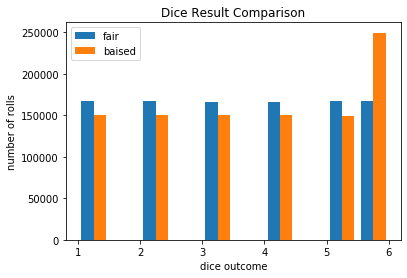

Run time: 9.47424054145813 seconds


In [5]:
import matplotlib.pyplot as plt
import pandas
import time
import worker # dice simulate functions have to be in a separate python file for multiprocessing on Windows
from multiprocessing import Pool
import multiprocessing

if __name__ == '__main__':       
    num_run = input("Enter number of rolls:")
    
    start_time = time.time()
    num_processors = multiprocessing.cpu_count()
    pool=Pool(processes = num_processors)
    
    # use multiprocessing to generate dice simulation result lists
    fair_dice_result = pool.map(worker.dice_simulate_fair,range(int(num_run)))
    biased_dice_result = pool.map(worker.dice_simulate_biased,range(int(num_run)))
    
    df = pandas.DataFrame([{'Roll Type':'fair','1':fair_dice_result.count(1),'2':fair_dice_result.count(2),
                           '3':fair_dice_result.count(3),'4':fair_dice_result.count(4),
                           '5':fair_dice_result.count(5),'6':fair_dice_result.count(6)},
                            {'Roll Type':'biased','1':biased_dice_result.count(1),'2':biased_dice_result.count(2),
                           '3':biased_dice_result.count(3),'4':biased_dice_result.count(4),
                           '5':biased_dice_result.count(5),'6':biased_dice_result.count(6)}])
    display(df)
    plt.title('Dice Result Comparison')
    plt.xlabel('dice outcome')
    plt.ylabel('number of rolls')
    _=plt.hist([fair_dice_result, biased_dice_result], label=['fair', 'baised'])
    plt.legend()
    plt.show()
    multiprocessing_time = time.time() - start_time
    print('Run time:', multiprocessing_time, 'seconds')

In [6]:
print('Time comparison for {0} simulation(s): '.format(int(num_run)))
print('Original with for loop: ', for_loop_time, 'seconds')
print('Revised with multiprocessing: ', multiprocessing_time, 'seconds')

Time comparison for 1000000 simulation(s): 
Original with for loop:  29.183242797851562 seconds
Revised with multiprocessing:  9.47424054145813 seconds
